# nuScenes Devkit Practice
This notebook demonstrates how to use the nuScenes devkit to explore scenes, samples, annotations, instances, categories, attributes, and visibility in the nuScenes dataset.

## Setup
1. Install dependencies from `requirements.txt`.
2. Link your dataset folder:
   ```bash
   ln -s /path/to/your/nuscenes ./nuscenes
   ```
   The dataset should contain subfolders like `v1.0-mini`.

## Usage
Run the cells below to interact with and visualize the nuScenes dataset. Each section is described for clarity.

In [1]:
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='./nuscenes')
nusc.list_scenes()

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.214 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.
scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parki

## Load nuScenes Dataset
Import the nuScenes devkit and load the dataset. Ensure the `dataroot` path points to your dataset symlink.

In [2]:
my_scene = nusc.scene[0]
my_scene

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

## Scene Data
Retrieve the first scene from the dataset. Scenes contain metadata and references to samples (frames) in nuScenes.

In [5]:
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

## Sample Data
Samples represent individual frames in a scene. Fetch the first sample and display its metadata.

In [6]:
my_sample['data']

{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

In [8]:
sensor = 'CAM_FRONT'
cam_front_token = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_token

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

## Sensor Data
Retrieve and display data from a specific sensor (e.g., front camera) for the selected sample.

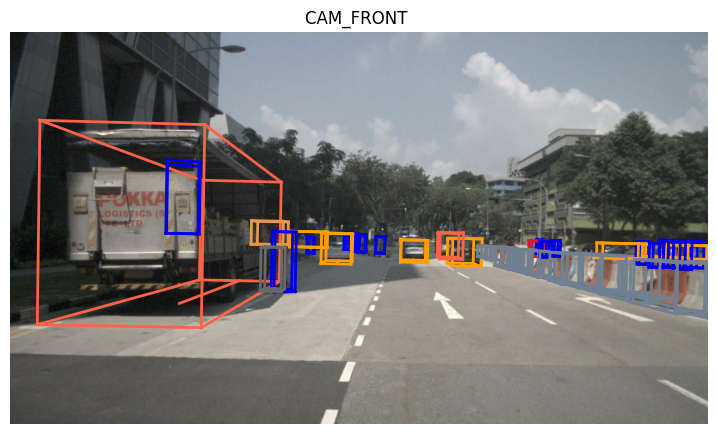

In [12]:
nusc.render_sample_data(cam_front_token['token'])

## Annotation Data
Annotations describe objects detected in each sample, such as vehicles or pedestrians. Fetch and display metadata for a specific annotation.

In [45]:
my_annotation_tokens = my_sample['anns'][10]
my_annotation_metadata = nusc.get('sample_annotation', my_annotation_tokens)
my_annotation_metadata

{'token': 'a0cac1c12246451684116067ae2611f6',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': '3c7d5216d6bd4e1ba7a982c7274214b1',
 'visibility_token': '4',
 'attribute_tokens': [],
 'translation': [408.524, 1190.723, 0.733],
 'size': [1.91, 0.555, 1.055],
 'rotation': [-0.9794504753332635, 0.0, 0.0, 0.20168481938272953],
 'prev': '',
 'next': '92ccde9818424044a35666b849d69604',
 'num_lidar_pts': 77,
 'num_radar_pts': 0,
 'category_name': 'movable_object.barrier'}

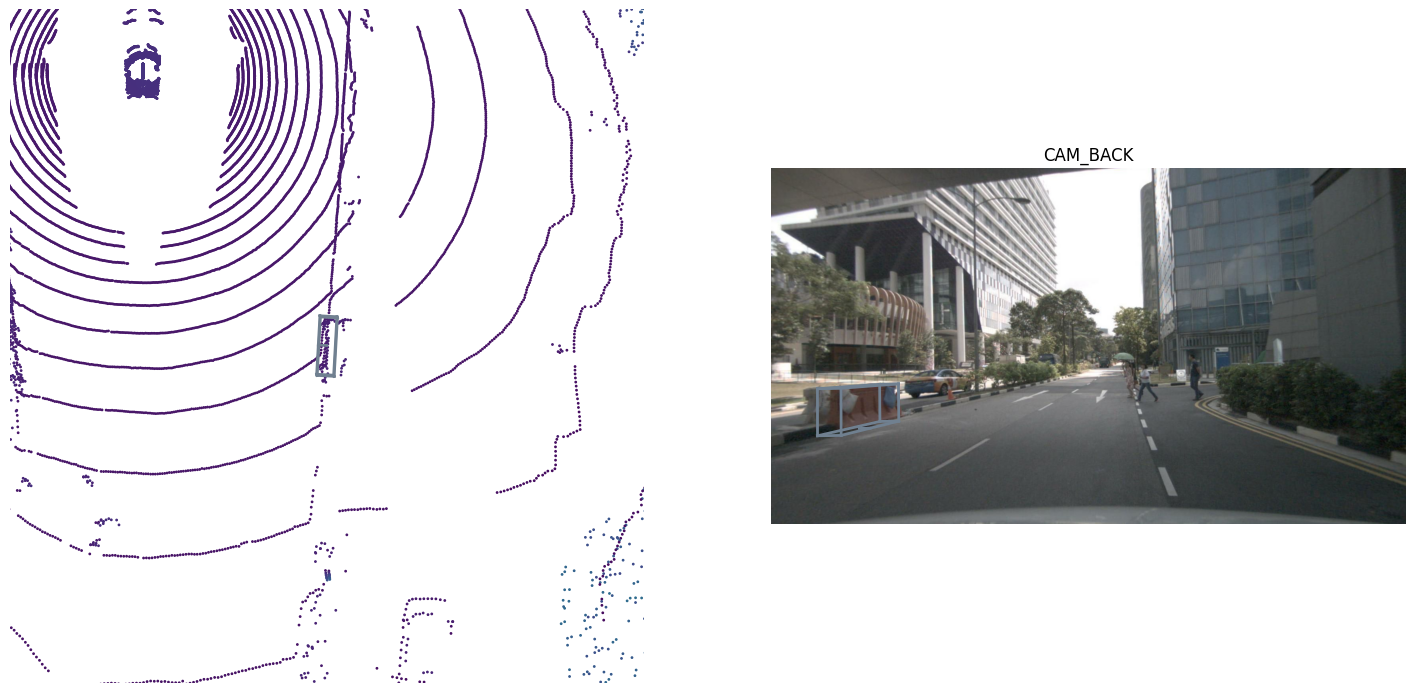

In [46]:
nusc.render_annotation(my_annotation_tokens)

## Instance Data
Instances represent unique objects tracked across multiple samples. Fetch and display an instance and its token.

In [47]:
my_instance = nusc.instance[200]
instance_token = my_instance['token']
instance_token

'aa3bf7a6025b43369a3cc8044bb031d9'

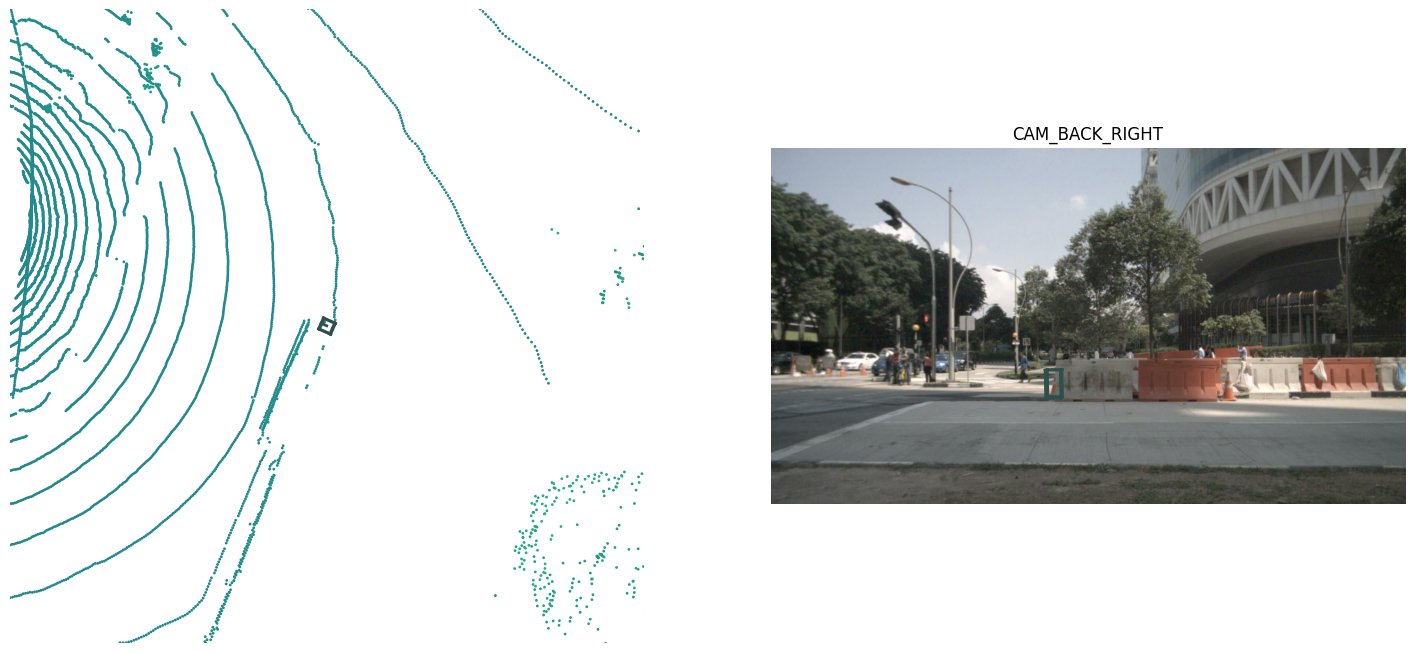

In [48]:
nusc.render_instance(instance_token)

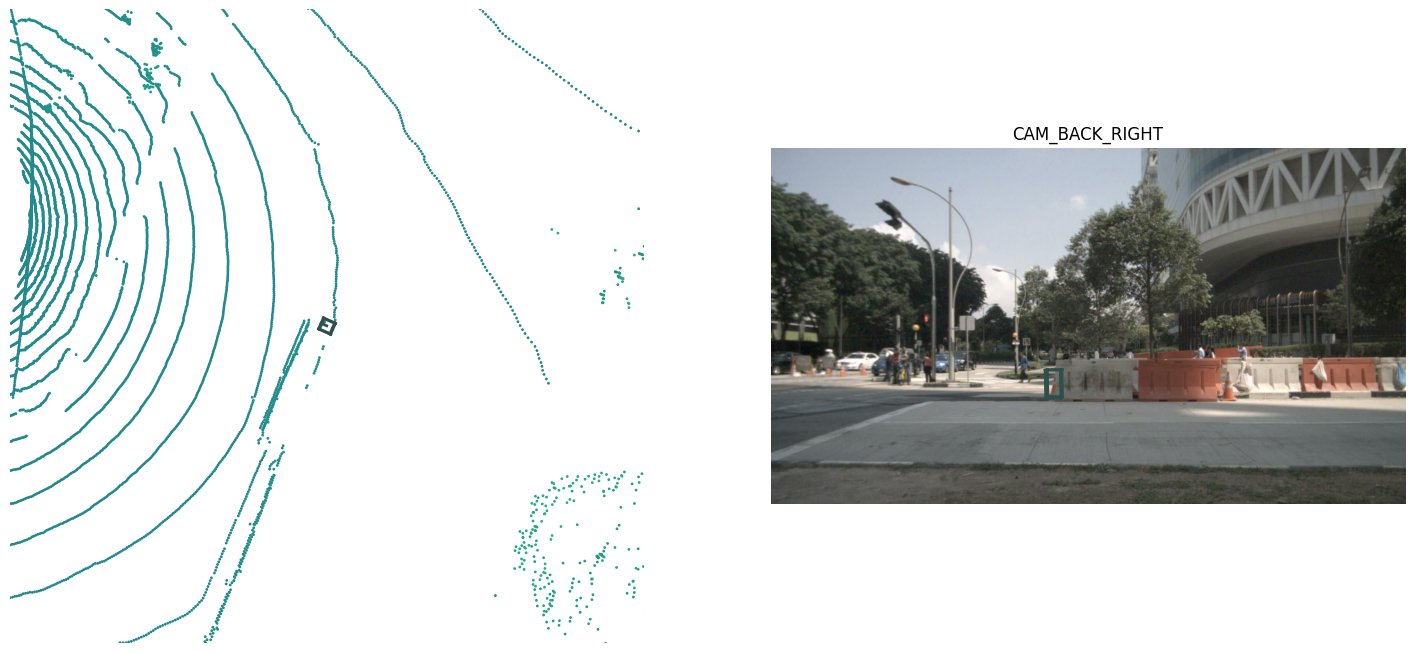

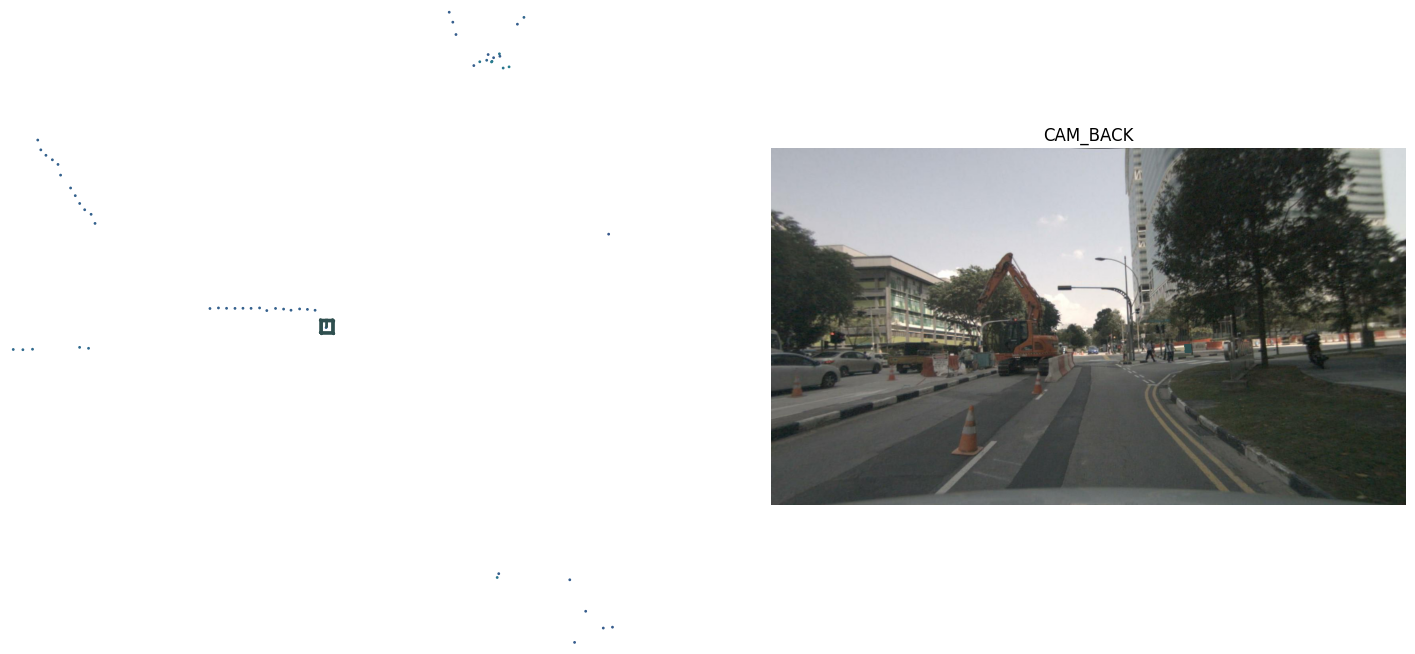

In [49]:
nusc.render_annotation(my_instance['first_annotation_token'])
nusc.render_annotation(my_instance['last_annotation_token'])

## Category Data
Categories describe the type of object (e.g., car, pedestrian) in nuScenes. List available categories and display details for one category.

In [50]:
nusc.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [51]:
nusc.category[1]

{'token': 'b1c6de4c57f14a5383d9f963fbdcb5cb',
 'name': 'human.pedestrian.child',
 'description': 'Child subcategory.'}

## Attribute Data
Attributes describe the state or behavior of an object, such as whether a pedestrian is standing or walking, or if a vehicle is parked or moving. Track attribute changes for an instance across its annotations.

In [61]:
my_instance = nusc.instance[27]
first_token = my_instance['first_annotation_token']
last_token = my_instance['last_annotation_token']
nbr_samples = my_instance['nbr_annotations']
current_token = first_token

i = 0
found_change = False
while current_token != last_token:
    current_ann = nusc.get('sample_annotation', current_token)
    current_attr = nusc.get('attribute', current_ann['attribute_tokens'][0])['name']
    if i == 0:
        pass
    elif current_attr != last_attr:
        print(f"Changed from '{last_attr}' to '{current_attr}' at timestamp {i} out of {nbr_samples} annotated timestamps.")
        found_change = True

    next_token = current_ann['next']
    current_token = next_token
    last_attr = current_attr
    i += 1

Changed from 'pedestrian.moving' to 'pedestrian.standing' at timestamp 21 out of 39 annotated timestamps.


## Visibility Data
Visibility indicates how clearly an object is seen in a sample, based on factors like occlusion or distance. Retrieve and display the visibility status for a specific annotation.

In [64]:
my_annotation_tokens = my_sample['anns'][10]
my_annotation_tokens

'a0cac1c12246451684116067ae2611f6'

In [66]:
visibility_token = nusc.get('sample_annotation', my_annotation_tokens)['visibility_token']
nusc.get('visibility', visibility_token)

{'description': 'visibility of whole object is between 80 and 100%',
 'token': '4',
 'level': 'v80-100'}

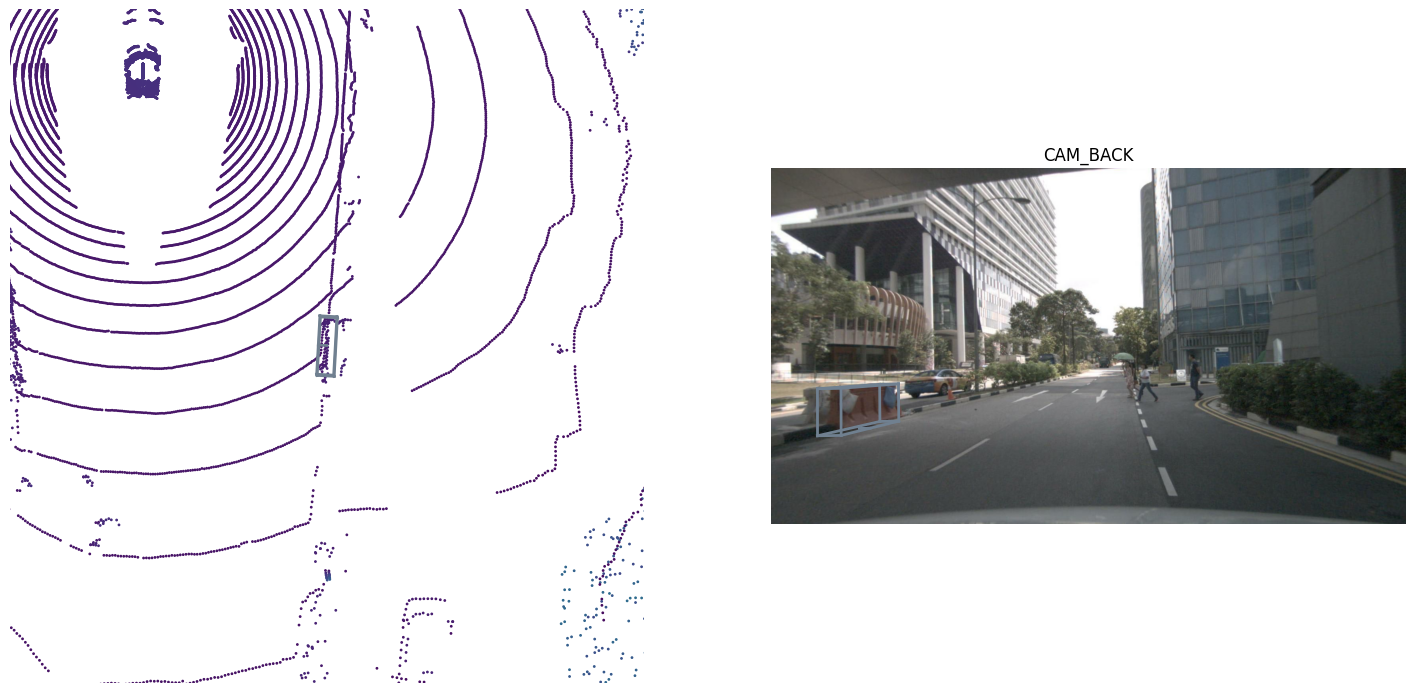

In [67]:
nusc.render_annotation(my_annotation_tokens)